In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../src")
from raytrace3D import OnePointTrace3D

# Homogeneous Media

### In homogenous media, the solution for $x(\lambda)$ with $\lambda$ being the length along the ray is
### $x_i = x_{i0} + v_0*p_{i0}*\lambda$

In [2]:
takeoff_angle = (25, 0) #inclination, azimuth
lf = 100

dx = 0.10
dy = 0.10
dz = 0.10

x_coords = np.arange(100)*dx
y_coords = np.arange(100)*dy
z_coords = np.arange(100)*dz

xx, yy, zz = np.meshgrid(x_coords, y_coords, z_coords)
velocity = np.ones_like(zz) #np.sqrt(1.5+1.0*zz)

src_coord = (x_coords[10],y_coords[50],z_coords[30])

tracer = OnePointTrace3D(src_coords=src_coord, 
                         takeoff_angles=takeoff_angle, 
                         velocity=velocity,
                         x_coords=x_coords, 
                         y_coords=y_coords, 
                         z_coords=z_coords,
                         lf=lf)

out = tracer.run(max_step=0.25)[0]
out_x = out['y'][0,:]
out_y = out['y'][1,:]
out_z = out['y'][2,:]
lambdas = out['t']

In [3]:
x_0, y_0, z_0, p_1, p_2, p_3, t_0 = out.init_conds  

def x_analytic_homogenous(s, x_0, p_0, v_0):
    return x_0+v_0*p_0*s

s = np.linspace(0,5)
x_true = x_analytic_homogenous(s, x_0=x_0, p_0=p_1, v_0=1.0)
z_true = x_analytic_homogenous(s, x_0=z_0, p_0=p_3, v_0=1.0)

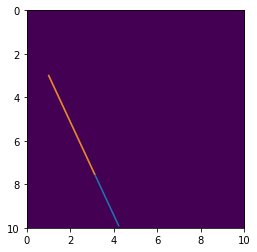

In [4]:
out_x = out['y'][0,:]
out_y = out['y'][1,:]
out_z = out['y'][2,:]
plt.imshow(velocity[:,50,:].T, extent =(0, 10, 10, 0))
plt.plot(out_x, out_z)
plt.plot(x_true, z_true)

# Constant gradient of slowness squared

Theses are velocity models in the form $\frac{1}{v^2} := v_0 + \mathbf{g} \cdot \mathbf{x}$ where g is a constant vector. We'll test with 
g_0 = 0, g_1=0, g2=1.0, v_0=1

From Cerveny, the analytic solution is

$x_i(σ) = x_{i0} + p_{i0}(σ −σ_0)+ \frac{1}{4} g_i(σ −σ_0)^2$

$p_i (σ ) = p_{i0} + \frac{1}{2} g_i (σ − σ_0 )$

$T(σ)=T(σ_0)+S^2(σ−σ_0)+\frac{1}{12}g_ip_{i0}(σ−σ_0)^2+ \frac{1}{12} g_ig_i(σ−σ_0)^3$

with $dσ = Vd\lambda$

In [5]:
lf = 100

dx = 0.10
dy = 0.10
dz = 0.10

x_coords = np.arange(100)*dx
y_coords = np.arange(100)*dy
z_coords = np.arange(100)*dz

xx, yy, zz = np.meshgrid(x_coords, y_coords, z_coords)
velocity = np.sqrt(1/(1.5+1.0*zz))

takeoff_angles = ((25, 0), (45,0), (75,0), (90, 0), (120, 0), (150,0)) #inclination, azimuth
src_coords = [(x_coords[10],y_coords[50],z_coords[30])]*len(takeoff_angles)

tracer = OnePointTrace3D(src_coords=src_coords, 
                         takeoff_angles=takeoff_angles, 
                         velocity=velocity,
                         x_coords=x_coords, 
                         y_coords=y_coords, 
                         z_coords=z_coords,
                         lf=lf)

out = tracer.run(max_step=0.10)

In [6]:
def x_analytic_vsq(sigma, x_0, p_0, g_i):
    return x_0+p_0*sigma+(1/4)*g_i*sigma**2

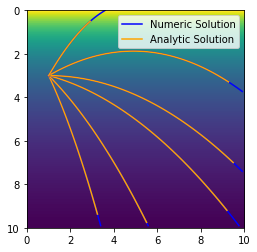

In [8]:
sigmas = [np.linspace(0,2.5),
          np.linspace(0,3.0),
          np.linspace(0,4.0),
          np.linspace(0, 4.0),
          np.linspace(0, 4.5),
          np.linspace(0, 1.8)]

for i, item in enumerate(out):
    x_0, y_0, z_0, p_1, p_2, p_3, t_0 = item.init_conds  
    sigma = sigmas[i]
    x_true = x_analytic_vsq(sigma, x_0=x_0, p_0=p_1, g_i=0.0)
    z_true = x_analytic_vsq(sigma, x_0=z_0, p_0=p_3, g_i=1.0)
    out_x = item['y'][0,:]
    out_y = item['y'][1,:]
    out_z = item['y'][2,:]
    plt.imshow(velocity[:,50,:].T, extent =(0, 10, 10, 0))
    if i == 0:
        label1='Numeric Solution'
        label2='Analytic Solution'
    else:
        label1 = ''
        label2 = ''
    plt.plot(out_x, out_z, color='blue', label=label1)
    plt.plot(x_true, z_true, color='orange', label=label2)
    plt.legend()